In [16]:
import numpy as np

from preprocess import *
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, LSTM
from keras.utils import to_categorical
import wandb
from wandb.keras import WandbCallback
import matplotlib.pyplot as plt

In [17]:
# user = "madwichery"
project = "Bab-4-616-dimensi"
# display_name = "length 1 - split 0.6 - ANN"

wandb.init(project=project)
config = wandb.config
config.max_len = 616
config.buckets = 20

accuracy,▁▄▆▇▇▇▇███▇▇████████████████████████████
epoch,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
loss,█▃▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
val_accuracy,▁▂▅▇▅▇▆▇▇▇▆▇▇▆▇▆▇▇▇▆▆▆▆▅█▆▆▇▅▆▇▅█▇█▇▆▇▇▇
val_loss,▅▂▁▁▂▂▂▂▂▃▃▄▃▃▃▄▄▄▄▅▅▅▅▆▅▆▇▆▆▆▆▇▆▆▆▇▇███
GFLOPs,0.00039
accuracy,0.97078
best_epoch,6
best_val_loss,127.26741
epoch,99
loss,5.4707


In [18]:
# Save data to array file first
save_data_to_array(max_len=config.max_len, n_mfcc=config.buckets)

labels=["108001",
        "108002",
        "108003",
        "109001",
        "109002",
        "109003",
        "109004",
        "109005",
        "109006",
        "110001",
        "110002",
        "110003",
        "111001",
        "111002",
        "111003",
        "111004",
        "111005",
        "112001",
        "112002",
        "112003",
        "112004",
        "113001",
        "113002",
        "113003",
        "113004",
        "113005",
        "114001",
        "114002",
        "114003",
        "114004",
        "114005",
        "114006"]

Saving vectors of label - '108001':   0%|          | 0/32 [00:00<?, ?it/s]D:\lab-uin\ml-class\preprocess.py:24: FutureWarning: Pass y=[0.         0.         0.         ... 0.00105286 0.00074768 0.00057983] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(wave, sr=16000, n_mfcc=n_mfcc)
Saving vectors of label - '108001':   3%|▎         | 1/32 [00:06<03:34,  6.91s/it]D:\lab-uin\ml-class\preprocess.py:24: FutureWarning: Pass y=[0. 0. 0. ... 0. 0. 0.] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(wave, sr=16000, n_mfcc=n_mfcc)
Saving vectors of label - '108001':   6%|▋         | 2/32 [00:08<01:53,  3.78s/it]D:\lab-uin\ml-class\preprocess.py:24: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.00085449 -0.00106812
 -0.0009613 ] as keyword args. From version 0.10 passing these as positional arguments will result in an 

In [19]:
# # Loading train set and test set
X_train, X_test, y_train, y_test = get_train_test()

In [20]:
# # Feature dimension
channels = 1
config.epochs = 100
config.batch_size = 1

num_classes = 32

X_train = X_train.reshape(X_train.shape[0], config.buckets, config.max_len, channels)
X_test = X_test.reshape(X_test.shape[0], config.buckets, config.max_len, channels)

6.0
616


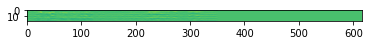

In [21]:
plt.imshow(X_train[10, :, :, 0])
print(y_train[10])
print(len(X_train))

In [22]:
y_train_hot = to_categorical(y_train)
y_test_hot = to_categorical(y_test)

In [23]:
X_train = X_train.reshape(X_train.shape[0], config.buckets, config.max_len)
X_test = X_test.reshape(X_test.shape[0], config.buckets, config.max_len)

model = Sequential()

# input layer
model.add(Flatten(input_shape=(config.buckets, config.max_len)))

# # 1st layer
# keras.layers.Dense(512, activation='relu'),
# keras.layers.Dropout(0.4),

# # 2nd layer
# keras.layers.Dense(256, activation='relu'),
# keras.layers.Dropout(0.4),

# # 3rd layer
# keras.layers.Dense(64, activation='relu'),
# keras.layers.Dropout(0.4),

# ----

# 1st for 1-layer
# keras.layers.Dense(32, activation='relu'),
# keras.layers.Dropout(0.4),

# ----

# 1st for 2-layer
# keras.layers.Dense(64, activation='relu'),
# keras.layers.Dropout(0.4),

# 2nd for 2-layer
# keras.layers.Dense(32, activation='relu'),
# keras.layers.Dropout(0.4),

# ---

# 1st layer for 3-layer
keras.layers.Dense(128, activation='relu'),
keras.layers.Dropout(0.4),

# 2nd layer for 3-layer
keras.layers.Dense(64, activation='relu'),
keras.layers.Dropout(0.4),

# 3rd layer for 3-layer
keras.layers.Dense(32, activation='relu'),
keras.layers.Dropout(0.4),

# ---

# output layer
model.add(Dense(num_classes, activation='softmax'))
model.compile(loss="categorical_crossentropy",
                  optimizer="adam",
                  metrics=['accuracy'])

In [24]:
model.fit(X_train, y_train_hot, epochs=config.epochs, validation_data=(X_test, y_test_hot), callbacks=[WandbCallback(data_type="image", labels=labels)])

Epoch 1/100
2/2 [==============================] - 0s 3ms/step
INFO:tensorflow:Assets written to: D:\lab-uin\ml-class\wandb\run-20220916_172622-2uecq37n\files\model-best\assets


wandb: Adding directory to artifact (D:\lab-uin\ml-class\wandb\run-20220916_172622-2uecq37n\files\model-best)... Done. 0.7s


20/20 [==============================] - 13s 523ms/step - loss: 338.1765 - accuracy: 0.0682 - val_loss: 276.4503 - val_accuracy: 0.1141
Epoch 2/100
2/2 [==============================] - 0s 3ms/step
INFO:tensorflow:Assets written to: D:\lab-uin\ml-class\wandb\run-20220916_172622-2uecq37n\files\model-best\assets


wandb: Adding directory to artifact (D:\lab-uin\ml-class\wandb\run-20220916_172622-2uecq37n\files\model-best)... Done. 0.2s


20/20 [==============================] - 15s 813ms/step - loss: 147.6398 - accuracy: 0.3068 - val_loss: 145.4735 - val_accuracy: 0.1869
Epoch 3/100
20/20 [==============================] - 1s 34ms/step - loss: 58.2323 - accuracy: 0.5422 - val_loss: 175.5673 - val_accuracy: 0.1796
Epoch 4/100
20/20 [==============================] - 1s 35ms/step - loss: 41.6090 - accuracy: 0.6299 - val_loss: 161.0240 - val_accuracy: 0.2597
Epoch 5/100
2/2 [==============================] - 0s 5ms/step
INFO:tensorflow:Assets written to: D:\lab-uin\ml-class\wandb\run-20220916_172622-2uecq37n\files\model-best\assets


wandb: Adding directory to artifact (D:\lab-uin\ml-class\wandb\run-20220916_172622-2uecq37n\files\model-best)... Done. 0.6s


20/20 [==============================] - 4s 202ms/step - loss: 35.6426 - accuracy: 0.6672 - val_loss: 139.4593 - val_accuracy: 0.2621
Epoch 6/100
20/20 [==============================] - 1s 67ms/step - loss: 21.6819 - accuracy: 0.7679 - val_loss: 170.1075 - val_accuracy: 0.2670
Epoch 7/100
2/2 [==============================] - 0s 6ms/step
INFO:tensorflow:Assets written to: D:\lab-uin\ml-class\wandb\run-20220916_172622-2uecq37n\files\model-best\assets


wandb: Adding directory to artifact (D:\lab-uin\ml-class\wandb\run-20220916_172622-2uecq37n\files\model-best)... Done. 0.4s


20/20 [==============================] - 3s 132ms/step - loss: 12.6173 - accuracy: 0.8101 - val_loss: 137.4315 - val_accuracy: 0.3107
Epoch 8/100
20/20 [==============================] - 1s 37ms/step - loss: 9.5863 - accuracy: 0.8653 - val_loss: 149.9644 - val_accuracy: 0.2888
Epoch 9/100
20/20 [==============================] - 1s 33ms/step - loss: 11.6816 - accuracy: 0.8555 - val_loss: 167.1310 - val_accuracy: 0.2840
Epoch 10/100
20/20 [==============================] - 1s 31ms/step - loss: 10.3391 - accuracy: 0.8669 - val_loss: 159.6893 - val_accuracy: 0.2888
Epoch 11/100
20/20 [==============================] - 1s 44ms/step - loss: 10.8333 - accuracy: 0.8864 - val_loss: 165.7869 - val_accuracy: 0.3083
Epoch 12/100
20/20 [==============================] - 1s 43ms/step - loss: 8.0211 - accuracy: 0.9123 - val_loss: 165.9035 - val_accuracy: 0.3010
Epoch 13/100
20/20 [==============================] - 1s 31ms/step - loss: 8.0337 - accuracy: 0.9156 - val_loss: 167.8344 - val_accuracy: 0.

In [25]:
# import keras.models
# my_model = keras.models.load_model("model.h5")
# # my_model.summary()
# # loss, acc = my_model.evaluate
# i = 0
#
# while i < 411:
#         X = X_test[i][np.newaxis, ...]
#         y = y_test[i]
#
#         prediction = my_model.predict(X)
#
#         indeks = np.argsort(prediction, axis=1)
#         akurasi = np.array_str(prediction)
#         predicted_index = np.argmax(prediction)
#         print("Data: {}, Terprediksi: {}".format(y, predicted_index))
#         print("Data: {}, Terprediksi: {}".format(y, indeks))
#         # print("Data: {}, Terprediksi: {}".format(y, akurasi))
#         i += 1

In [26]:
# import gradio as gr
#
# def greet(name):
#     return "Hello " + name + "!!"
#
# iface = gr.Interface(fn=greet, inputs="text", outputs="text")
# iface.launch()

In [27]:
# wandb.finish()

In [28]:
# build model
# model = Sequential()
# model.add(LSTM(16, input_shape=(config.buckets, config.max_len, channels), activation="sigmoid"))
# model.add(Dense(1, activation='sigmoid'))
# model.add(Dense(num_classes, activation='softmax'))

In [29]:

# model.fit(X_train, y_train_hot, epochs=config.epochs, validation_data=(X_test, y_test_hot), callbacks=[WandbCallback(data_type="image", labels=labels)])
# Save a model file manually from the current directory:

In [30]:
# pip install gradio wandb